#Trabalho Prático de Visualização dos Dados

Equipe desenvovledora composta por:
*  Gian Giovanni Rodrigues da Silva

*  Jessyca Jordanna Barroso de Moraes

*  Tammy Hikari Yanai Gusmão

*  Thalita Naiara Andre Alves

##Imports Gerais

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import math
import seaborn as sns
import os
from scipy import stats
%matplotlib inline

In [ ]:
sns.set_theme()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Relationship
## Dataset: 2016 Olympics in Rio de Janeiro

Este dataset contém dados oficiais dos 11.538 atletas e 306 eventos dos Jogos Olímpicos de 2016 no Rio de Janeiro.

Fonte: https://www.kaggle.com/rio2016/olympic-games/

*   Colunas
1. **name** - Nome do atleta
1. **nationality** - sigla do pais
1. **gender** - gênero do atleta
1. **dob** - data de nascimento
1. **height** - altura em metros
1. **weight** - peso em quilos
1. **sport** - esporte
1. **gold** - quantidade de medalhas de ouro
1. **silver** - quantidade de medalhas de prata
1. **bronze** - quantidade de medalhas de bronze

In [ ]:
df_athletes = pd.read_csv('/content/drive/Shareddrives/mod5_trabalhopratico/bases/athletes.csv')
df_athletes 

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [ ]:
df_aquatics = df_athletes[['sport','height', 'weight', 'gold', 'sex']].copy()
df_aquatics = df_aquatics[(df_aquatics['sport']=='aquatics') & (df_aquatics['gold'] > 0) ]
df_aquatics.dropna()

,sport,height,weight,gold,sex
14,aquatics,1.78,68.0,1,female
85,aquatics,1.93,88.0,1,male
223,aquatics,1.68,60.0,2,male
316,aquatics,1.69,49.0,1,female
526,aquatics,1.70,56.0,1,female
...,...,...,...,...,...
10908,aquatics,1.62,48.0,1,female
11145,aquatics,2.00,92.0,1,male
11328,aquatics,1.67,62.0,1,male
11338,aquatics,1.64,58.0,1,male


## Relação entre idade e peso dos atletas aquáticos com medalha de ouro (Gráfico de Dispersão - 2 variávies)

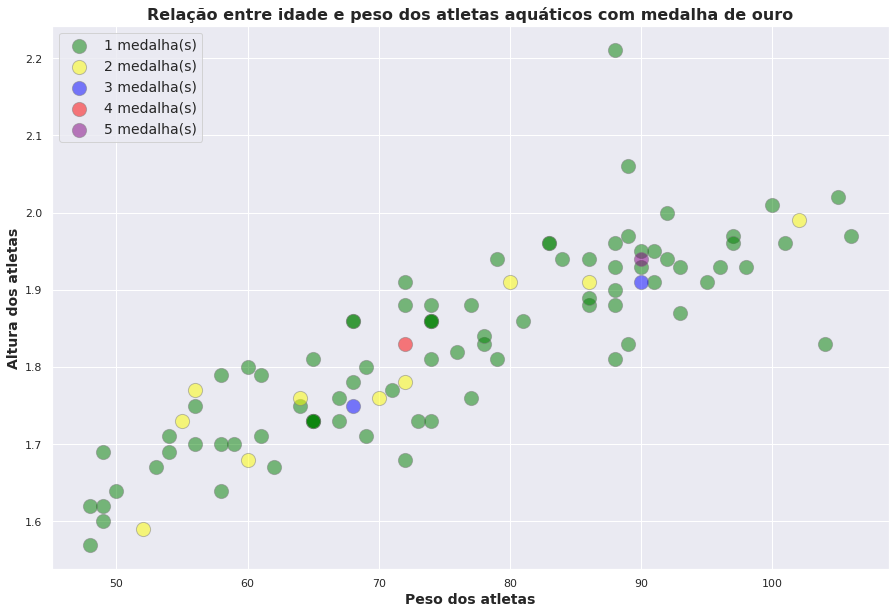

In [ ]:
colors = ['green', 'yellow', 'blue', 'red', 'purple']
labels=df_aquatics['gold'].unique()
labels.sort()
plt.figure(figsize=(15, 10))
for i, label in enumerate(labels):
  df_aquatics_temp = df_aquatics[df_aquatics['gold']==label]
  y = df_aquatics_temp.height
  x = df_aquatics_temp.weight
  plt.scatter(x,y, s=200, c=colors[i], linewidth=1, alpha=.5, edgecolors='grey', label=str(label)+' medalha(s)')
plt.title('Relação entre idade e peso dos atletas aquáticos com medalha de ouro', weight = 'bold', size = 16)
plt.xlabel('Peso dos atletas', weight = 'bold', size = 14)
plt.ylabel('Altura dos atletas', weight = 'bold', size = 14)
plt.legend(loc='upper left', fontsize=14)
plt.show()

## Relação entre idade, peso e quantidade de medalhas de ouro de atletas aquáticos (Gráfico de Bolha - 3 variávies)



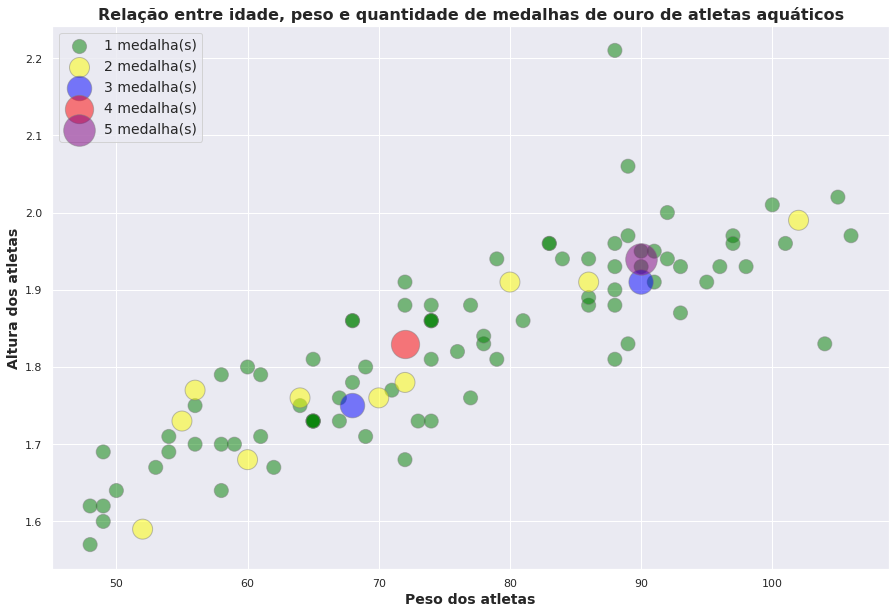

In [ ]:
colors = ['green', 'yellow', 'blue', 'red', 'purple']
labels=df_aquatics['gold'].unique()
labels.sort()
plt.figure(figsize=(15, 10))
for i, label in enumerate(labels):
  df_aquatics_temp = df_aquatics[df_aquatics['gold']==label]
  y = df_aquatics_temp.height
  x = df_aquatics_temp.weight
  size = df_aquatics_temp.gold
  plt.scatter(x,y, s=200 * size, c=colors[i], cmap='viridis',
              linewidth=1, alpha=.5, edgecolors='grey', label=str(label)+' medalha(s)')
plt.title('Relação entre idade, peso e quantidade de medalhas de ouro de atletas aquáticos', weight = 'bold', size = 16)
plt.xlabel('Peso dos atletas', weight = 'bold', size = 14)
plt.ylabel('Altura dos atletas', weight = 'bold', size = 14)
plt.legend(loc='upper left', fontsize = 14)
plt.show()

# Distribution
## Dataset: 2016 Olympics in Rio de Janeiro

Este dataset contém dados oficiais dos 11.538 atletas e 306 eventos dos Jogos Olímpicos de 2016 no Rio de Janeiro.

Fonte: https://www.kaggle.com/rio2016/olympic-games/

*   Colunas
1. **name** - Nome do atleta
1. **nationality** - sigla do pais
1. **gender** - gênero do atleta
1. **dob** - data de nascimento
1. **height** - altura em metros
1. **weight** - peso em quilos
1. **sport** - esporte
1. **gold** - quantidade de medalhas de ouro
1. **silver** - quantidade de medalhas de prata
1. **bronze** - quantidade de medalhas de bronze

In [ ]:
df_athletes = pd.read_csv('/content/drive/Shareddrives/mod5_trabalhopratico/bases/athletes.csv')
df_athletes 

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [ ]:
# Cálcular idade pela data de nascimento
now = pd.Timestamp('now')
df_athletes['dob'] = pd.to_datetime(df_athletes['dob'], format='%m/%d/%y')
df_athletes['dob'] = df_athletes['dob'].where(df_athletes['dob'] < now, df_athletes['dob'] -  np.timedelta64(100, 'Y'))
df_athletes['age'] = (now - df_athletes['dob']).astype('<m8[Y]') 

df_aquatics = df_athletes[['sport','height', 'weight', 'gold', 'sex']].copy()
df_aquatics = df_aquatics[(df_aquatics['sport']=='aquatics') & (df_aquatics['gold'] > 0) ]
df_aquatics.dropna()

,sport,height,weight,gold,sex
14,aquatics,1.78,68.0,1,female
85,aquatics,1.93,88.0,1,male
223,aquatics,1.68,60.0,2,male
316,aquatics,1.69,49.0,1,female
526,aquatics,1.70,56.0,1,female
...,...,...,...,...,...
10908,aquatics,1.62,48.0,1,female
11145,aquatics,2.00,92.0,1,male
11328,aquatics,1.67,62.0,1,male
11338,aquatics,1.64,58.0,1,male


## Atletas por idade que receberam pelo menos 1 medalha de ouro (Histograma)

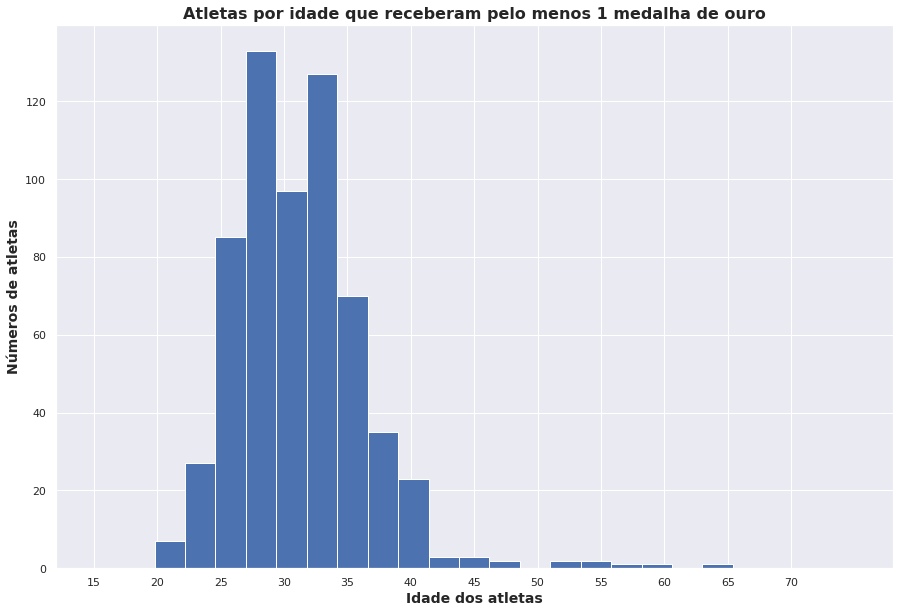

In [ ]:
df_temp = df_athletes[df_athletes['gold']>0]
ages = df_temp['age'].copy()

plt.figure(figsize=(15, 10))
ages.plot.hist(grid=True, bins=25, range=(15, 75))
plt.title('Atletas por idade que receberam pelo menos 1 medalha de ouro', weight = 'bold', size = 16)
plt.xlabel('Idade dos atletas', weight = 'bold', size = 14)
plt.ylabel('Números de atletas', weight = 'bold', size = 14)

dim=np.arange(15, 75, 5)
plt.xticks(dim);

## Densidade de atletas por idade que receberam pelo menos 1 medalha de ouro (Densidade)



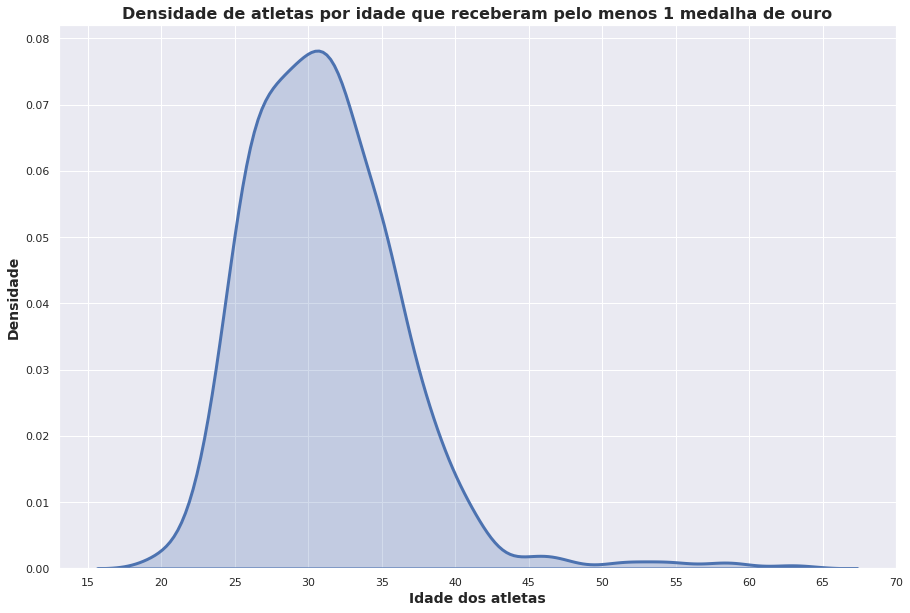

In [ ]:
plt.figure(figsize=(15, 10))

sns.kdeplot(ages, shade=True, linewidth=3)

plt.title('Densidade de atletas por idade que receberam pelo menos 1 medalha de ouro', weight = 'bold', size = 16)
plt.xlabel('Idade dos atletas' , weight = 'bold', size = 14)
plt.ylabel('Densidade', weight = 'bold', size = 14)

dim=np.arange(15, 75, 5)
plt.xticks(dim);
plt.show()

# Composition - Changing Over Time
## Dataset: COVID-19 World Vaccination Progress

Este dataset contém dados coletados diariamente do repositório Our World in Data no GitHub para covid-19, mesclados e carregados.

Fonte: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

* Colunas

1. **Country -** este é o país para o qual as informações de vacinação são fornecidas;

2. **Country ISO Code -** sigla do país;

3. **Date -** data para a entrada de dados; para algumas das datas temos apenas as vacinações diárias, para outras, apenas o total (cumulativo);

4. **Total number of vaccinations -** é o número absoluto de imunizações totais no país;

5. **Total number of people vaccinated -** uma pessoa, dependendo do esquema de imunização, receberá uma ou mais (normalmente 2) vacinas; em determinado momento, o número de vacinações pode ser maior do que o número de pessoas;

6. **Total number of people fully vaccinated -** este é o número de pessoas que receberam todo o conjunto de imunização de acordo com o esquema de imunização (normalmente 2); em determinado momento, pode haver um determinado número de pessoas que receberam uma vacina e outro número (menor) de pessoas que receberam todas as vacinas do esquema;

7. **Daily vaccinations (raw) -** para uma determinada entrada de dados, o número de vacinação para aquela data/país;

8. **Daily vaccinations -** para uma determinada entrada de dados, o número de vacinação para aquela data/país;

9. **Total vaccinations per hundred -** razão (em porcentagem) entre o número de vacinações e a população total até a data no país;

10. **Total number of people vaccinated per hundred -** razão (em porcentagem) entre a população imunizada e a população total até a data no país;

11. **Total number of people fully vaccinated per hundred -** razão (em porcentagem) entre a população totalmente imunizada e a população total até a data no país;

12. **Daily vaccinations per million -** razão (em ppm) entre o número de vacinações e a população total para a data atual no país;

13. **Vaccines used in the country -** nome das vacinas utilizadas no país;

14. **Source name -** fonte da informação (autoridade nacional, organização internacional, organização local, etc.);

15. **Source website -** site da fonte de informação.

In [ ]:
df_vacinas_covid = pd.read_csv('/content/drive/Shareddrives/mod5_trabalhopratico/bases/country_vaccinations.csv')

## Países que mais vacinaram em todos os meses - TOP 5
### 07/Dez/2020 a 01/Mar/2021

In [ ]:
#Total de vacinas dos países top 5
df_vacinas_top5 = df_vacinas_covid.groupby('country', as_index = False).agg({'total_vaccinations': 'sum'})
df_vacinas_top5 = df_vacinas_top5.astype({'total_vaccinations': 'int64'})
df_vacinas_top5 = df_vacinas_top5.sort_values('total_vaccinations',ascending = False).head(5)
df_vacinas_top5.reset_index(drop = True, inplace = True)
df_vacinas_top5

,country,total_vaccinations
0,United States,1882011126
1,United Kingdom,575310789
2,England,490715805
3,Israel,284592379
4,India,266085353


In [ ]:
#Lista com o nome dos países top 5
vacinas_top5_paises = list(df_vacinas_top5.country)
vacinas_top5_paises

['United States', 'United Kingdom', 'England', 'Israel', 'India']

In [ ]:
#Filtrando dataframe
df_vacinas_top5_paises = df_vacinas_covid[df_vacinas_covid.country.isin(vacinas_top5_paises)].reset_index(drop = True)
df_vacinas_top5_paises

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,England,NaN,2020-12-13,55467.0,55467.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1,England,NaN,2020-12-14,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2,England,NaN,2020-12-15,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3,England,NaN,2020-12-16,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
4,England,NaN,2020-12-17,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,United States,USA,2021-02-25,68274117.0,46074392.0,21555117.0,1809170.0,1505193.0,20.41,13.78,6.45,4501.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
342,United States,USA,2021-02-26,70454064.0,47184199.0,22613359.0,2179947.0,1552717.0,21.07,14.11,6.76,4643.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
343,United States,USA,2021-02-27,72806180.0,48435536.0,23698627.0,2352116.0,1645240.0,21.77,14.48,7.09,4919.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
344,United States,USA,2021-02-28,75236003.0,49772180.0,24779920.0,2429823.0,1735053.0,22.50,14.88,7.41,5188.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


## Vacinações do Top 5 Países por Semana
### Gráfico de Áreas

In [ ]:
#Adicionando coluna com o número da semana
df_vacinas_top5_paises['date'] = pd.to_datetime(df_vacinas_top5_paises.date)
df_vacinas_top5_paises['week_number'] = df_vacinas_top5_paises['date'].dt.week

df_vacinas_top5_paises

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,week_number
0,England,NaN,2020-12-13,55467.0,55467.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,50
1,England,NaN,2020-12-14,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,51
2,England,NaN,2020-12-15,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,51
3,England,NaN,2020-12-16,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,51
4,England,NaN,2020-12-17,NaN,NaN,NaN,NaN,74120.0,NaN,NaN,NaN,1317.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,United States,USA,2021-02-25,68274117.0,46074392.0,21555117.0,1809170.0,1505193.0,20.41,13.78,6.45,4501.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,8
342,United States,USA,2021-02-26,70454064.0,47184199.0,22613359.0,2179947.0,1552717.0,21.07,14.11,6.76,4643.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,8
343,United States,USA,2021-02-27,72806180.0,48435536.0,23698627.0,2352116.0,1645240.0,21.77,14.48,7.09,4919.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,8
344,United States,USA,2021-02-28,75236003.0,49772180.0,24779920.0,2429823.0,1735053.0,22.50,14.88,7.41,5188.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,8


In [ ]:
#Total de vacinações por país e por semana
df_vacinas_top5_paises = df_vacinas_top5_paises.total_vaccinations.groupby([df_vacinas_top5_paises['country'],
                                                                            df_vacinas_top5_paises['week_number']])\
                                                                            .agg({'sum'}).reset_index()

df_vacinas_top5_paises = df_vacinas_top5_paises.rename({'sum': 'total_vaccinations'}, axis = 'columns')\
                                 .astype({'total_vaccinations': 'int64'})

df_vacinas_top5_paises

,country,week_number,total_vaccinations
0,England,1,2333764
1,England,2,22489177
2,England,3,36044722
3,England,4,51749196
4,England,5,69414874
5,England,6,86252011
6,England,7,102376660
7,England,8,117391129
8,England,50,55467
9,England,51,574307


In [ ]:
#Apenas as semanas em que os países do top 5 possuem registros
sem = df_vacinas_top5_paises.week_number.value_counts()
df_vacinas_top5_paises = df_vacinas_top5_paises[df_vacinas_top5_paises.week_number.isin(sem.index[sem == 5])]
df_vacinas_top5_paises

,country,week_number,total_vaccinations
1,England,2,22489177
2,England,3,36044722
3,England,4,51749196
4,England,5,69414874
5,England,6,86252011
6,England,7,102376660
7,England,8,117391129
12,India,2,415482
13,India,3,7567199
14,India,4,20340525


In [ ]:
#DF para o gráfico de áreas empilhadas
paises = df_vacinas_top5_paises['country'].unique()
semanas = df_vacinas_top5_paises['week_number'].unique()

dados = {}
for pais in paises:
    dados[pais] = df_vacinas_top5_paises[df_vacinas_top5_paises['country']==pais]['total_vaccinations'].values

df_areas_emp_5 = pd.DataFrame(dados, index = semanas)
df_areas_emp_5 

,England,India,Israel,United Kingdom,United States
2,22489177,415482,15819575,25806728,52021093
3,36044722,7567199,23278826,41277988,111273847
4,51749196,20340525,31982537,59405334,185707415
5,69414874,34502604,37699126,80442019,251153339
6,86252011,43412794,43079925,101847983,328720845
7,102376660,68780830,49247976,121481515,353205135
8,117391129,91065919,55111792,139204900,482444868


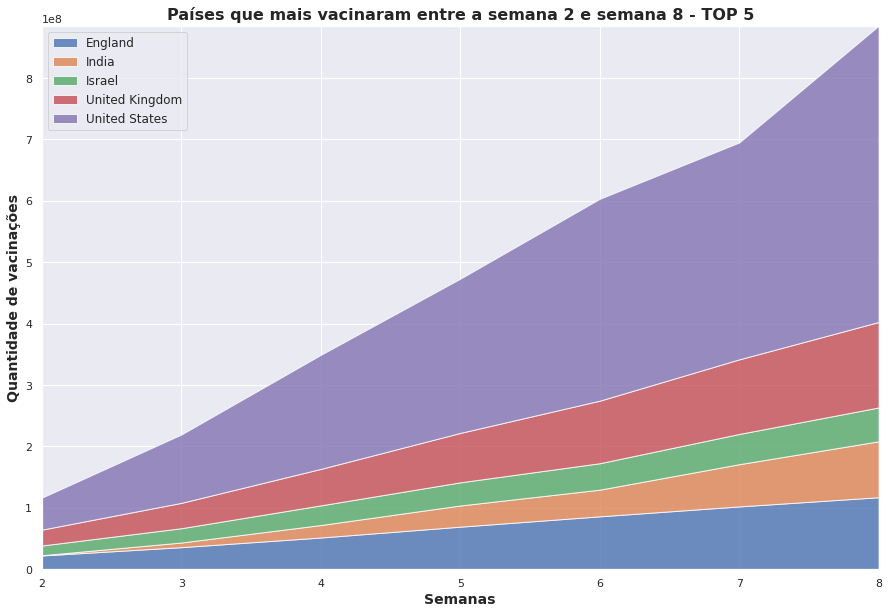

In [ ]:
#Gráfico de áreas empilhadas
plt.figure(figsize = (15,10))

df_temp = df_areas_emp_5
paises = df_temp.columns

x, y = semanas, []

for pais in paises:
    y.append(df_temp[pais].values)

plt.stackplot(x,y, labels = paises, alpha=.8)

plt.title('Países que mais vacinaram entre a semana 2 e semana 8 - TOP 5', weight = 'bold', size = 16)
plt.xlabel('Semanas', weight = 'bold', size = 14)
plt.ylabel('Quantidade de vacinações', weight = 'bold', size = 14)
plt.xticks()
plt.legend(loc = 'upper left', fontsize = 12)
plt.margins(0,0)

plt.show()

In [ ]:
#DF para o gráfico de áreas 100% empilhadas
df_temp = df_areas_emp_5
paises = df_temp.columns

lista = []
for semana in semanas:
    lista.append(df_temp.loc[semana].values / df_temp.loc[semana].sum())

df_areas_emp_5_100 = pd.DataFrame(np.matrix(lista), index = semanas, columns = paises)
df_areas_emp_5_100

,England,India,Israel,United Kingdom,United States
2,0.192954,0.003565,0.135730,0.221418,0.446334
3,0.164256,0.034484,0.106082,0.188104,0.507075
4,0.148200,0.058251,0.091592,0.170126,0.531831
5,0.146689,0.072912,0.079666,0.169992,0.530742
6,0.142964,0.071957,0.071406,0.168814,0.544859
7,0.147285,0.098952,0.070851,0.174770,0.508141
8,0.132613,0.102874,0.062258,0.157255,0.545001


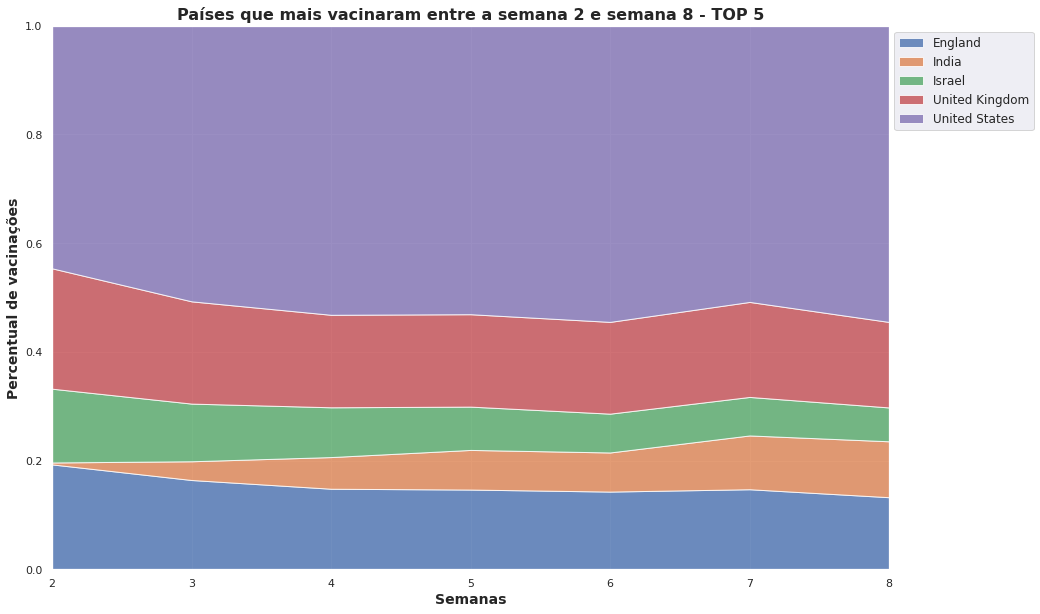

In [ ]:
#Gráfico de áreas 100% empilhadas
plt.figure(figsize=(15,10))

df_temp = df_areas_emp_5_100
paises = df_temp.columns

x, y = semanas, []

for produto in paises:
    y.append(df_temp[produto].values)

plt.stackplot(x,y, labels = paises, alpha = 0.8)

plt.title('Países que mais vacinaram entre a semana 2 e semana 8 - TOP 5', weight = 'bold', size = 16)
plt.xlabel('Semanas', weight = 'bold', size = 14)
plt.ylabel('Percentual de vacinações', weight = 'bold', size = 14)
plt.legend(bbox_to_anchor = (0.68, 0, 0.5, 1), fontsize = 12)
plt.margins(0,0)

plt.show()

##TOP 5 dos Países com Maior Avanço na Vacinação contra COVID-19

O *dataset* utilizado para esta problemática é referente ao progresso na vacinação contra COVID-19. Os dados foram coletados a partir do dia 7 de dezembro de 2020. Registros incluem dados de até o dia primeiro de março. 

Fonte: [Kaggle](https://www.kaggle.com/gpreda/covid-world-vaccination-progress). Versão 58. 

In [ ]:
#Casting e adequação do dado
df_vacinas_covid['month_year'] = df_vacinas_covid['date'].astype('datetime64')
df_vacinas_covid['month_year'] = df_vacinas_covid['month_year'].dt.strftime('%Y-%m')

In [ ]:
#Devolve um dataframe filtrado, dado um período (ano-mês)
def getDFByPeriod(_df, column, period):
  return _df[_df[column] == period]

In [ ]:
#Devolve um dataframe que não contenha 
def getDFWithOnlyData(_df, column):
  return _df[_df[column].notnull() & (_df[column] != "")]

In [ ]:
#Devovle um dataframe TOP5 (organizado de forma decrescente)
#que está agrupado por duas colunas
#e que soma os valores de uma terceira coluna.
#Também renomeia uma das colunas resultantes.

def getTOP5(_df, column1, column2, column3):
  df_aux = _df.groupby([column1, column2]).agg({column3:np.sum}).reset_index()
  df_aux[column3] = df_aux[column3].astype('int64')

  final_df = df_aux.sort_values(by=[column3], ascending=False)
  return final_df.head()

In [ ]:
month_year = df_vacinas_covid['month_year'].unique()
print('Perídos presentes no dataset:',month_year)

Perídos presentes no dataset: ['2021-01' '2021-02' '2020-12' '2021-03']


In [ ]:
#Adquirindo dataframes específicos para cada mês/ano presente, desconsiderando NaNs e dados faltantes 
#Para o período 2020-12

df_dez20 = getDFByPeriod(df_vacinas_covid, 'month_year', '2020-12')
df_dez20 = getDFWithOnlyData(df_dez20, 'total_vaccinations')
df_dez20 = getTOP5(df_dez20, 'month_year', 'country', 'total_vaccinations')
df_dez20 = df_dez20.sort_values(by=['country'])
df_dez20

,month_year,country,total_vaccinations
7,2020-12,China,6000000
12,2020-12,England,1471742
21,2020-12,Israel,4443152
39,2020-12,United Kingdom,1765027
40,2020-12,United States,9044666


In [ ]:
#Adquirindo dataframes específicos para cada mês/ano presente, desconsiderando NaNs e dados faltantes 
#Para o período 2021-01

df_jan21 = getDFByPeriod(df_vacinas_covid, 'month_year', '2021-01')
df_jan21 = getDFWithOnlyData(df_jan21, 'total_vaccinations')
df_jan21 = getTOP5(df_jan21, 'month_year', 'country', 'total_vaccinations')
df_jan21 = df_jan21.sort_values(by=['country'])
df_jan21

,month_year,country,total_vaccinations
15,2021-01,China,80767000
23,2021-01,England,113809389
39,2021-01,Israel,86798411
80,2021-01,United Kingdom,130569345
81,2021-01,United States,380542286


In [ ]:
#Adquirindo dataframes específicos para cada mês/ano presente, desconsiderando NaNs e dados faltantes 
#Para o período 2021-02

df_fev21 = getDFByPeriod(df_vacinas_covid, 'month_year', '2021-02')
df_fev21 = getDFWithOnlyData(df_fev21, 'total_vaccinations')
df_fev21 = getTOP5(df_fev21, 'month_year', 'country', 'total_vaccinations')
df_fev21 = df_fev21.sort_values(by=['country'])
df_fev21

,month_year,country,total_vaccinations
31,2021-02,England,375434674
46,2021-02,India,237762147
51,2021-02,Israel,185138819
108,2021-02,United Kingdom,442976417
109,2021-02,United States,1415524187


In [ ]:
#Adquirindo dataframes específicos para cada mês/ano presente, desconsiderando NaNs e dados faltantes 
#Para o período 2021-03

df_mar21 = getDFByPeriod(df_vacinas_covid, 'month_year', '2021-03')
df_mar21 = getDFWithOnlyData(df_mar21, 'total_vaccinations')
df_mar21 = getTOP5(df_mar21, 'month_year', 'country', 'total_vaccinations')
df_mar21 = df_mar21.sort_values(by=['country'])
df_mar21

,month_year,country,total_vaccinations
4,2021-03,Brazil,8465403
14,2021-03,Germany,6394364
19,2021-03,Israel,8211997
33,2021-03,Turkey,8774718
36,2021-03,United States,76899987


Com as tabelas apresentadas acima, verifica-se que somente alguns países são frequentes na maioria dos meses presentes. Deste modo, a análise do avanço de vacinação focará nos seguintes países: *United States*, *United Kingdom*, *Israel*, *England* e *China*. Os *dataframes* a serem modificados serão somente os de fevereiro/2021 e março/2021.


In [ ]:
def getTotalVacByCountryPeriod (_df, _country, _period):
  query = _df.query("(country==@_country) and (month_year==@_period)")
  cont = 0
  for index, row in query.iterrows():
    cont = cont + row['total_vaccinations']
  return cont

In [ ]:
paises = df_jan21['country'].unique()

In [ ]:
#Alguns registros não possuem informação numérica - ou está vazio ('') ou é um dado faltante.
df_vacinas_covid['total_vaccinations'].fillna(0,inplace=True)

In [ ]:
def getDFByCountryPeriod(_df, _period):
  df_aux = pd.DataFrame({'month_year': [],
                         'country': [],
                         'total_vaccinations': []})
  for pais in paises:
    df_aux = df_aux.append({'month_year':_period, 
                            'country':pais,
                            'total_vaccinations':getTotalVacByCountryPeriod (_df, pais, _period)}, ignore_index=True)
    
  df_aux.sort_values(by=['total_vaccinations'], ascending=False, inplace=True)
  return df_aux

In [ ]:
df_fev21 = getDFByCountryPeriod(df_vacinas_covid, '2021-02')
df_fev21 = df_fev21.sort_values(by=['country'])
df_fev21

,month_year,country,total_vaccinations
0,2021-02,China,7.172000e+07
1,2021-02,England,3.754347e+08
2,2021-02,Israel,1.851388e+08
3,2021-02,United Kingdom,4.429764e+08
4,2021-02,United States,1.415524e+09


In [ ]:
df_mar21 = getDFByCountryPeriod(df_vacinas_covid, '2021-03')
df_mar21 = df_mar21.sort_values(by=['country'])
df_mar21

,month_year,country,total_vaccinations
0,2021-03,China,0.0
1,2021-03,England,0.0
2,2021-03,Israel,8211997.0
3,2021-03,United Kingdom,0.0
4,2021-03,United States,76899987.0


In [ ]:
df_top5_meses = pd.concat([df_dez20, df_jan21])
df_top5_meses = pd.concat([df_top5_meses, df_fev21])
df_top5_meses = pd.concat([df_top5_meses, df_mar21])
df_top5_meses.reset_index(inplace=True, drop=True)
df_top5_meses['total_vaccinations'] = df_top5_meses['total_vaccinations'].astype('int64')
df_top5_meses

,month_year,country,total_vaccinations
0,2020-12,China,6000000
1,2020-12,England,1471742
2,2020-12,Israel,4443152
3,2020-12,United Kingdom,1765027
4,2020-12,United States,9044666
5,2021-01,China,80767000
6,2021-01,England,113809389
7,2021-01,Israel,86798411
8,2021-01,United Kingdom,130569345
9,2021-01,United States,380542286


In [ ]:
#Gerando um outro dataframe (reshape do df_top5_meses)
dados = {}

paises = df_top5_meses['country'].unique()
meses = df_top5_meses['month_year'].unique()
aux = []

for pais in paises:
  dados[pais] = df_top5_meses[df_top5_meses['country']==pais]\
                        ['total_vaccinations'].values

df_col_emp = pd.DataFrame(dados, index=meses)
df_col_emp

,China,England,Israel,United Kingdom,United States
2020-12,6000000,1471742,4443152,1765027,9044666
2021-01,80767000,113809389,86798411,130569345,380542286
2021-02,71720000,375434674,185138819,442976417,1415524187
2021-03,0,0,8211997,0,76899987


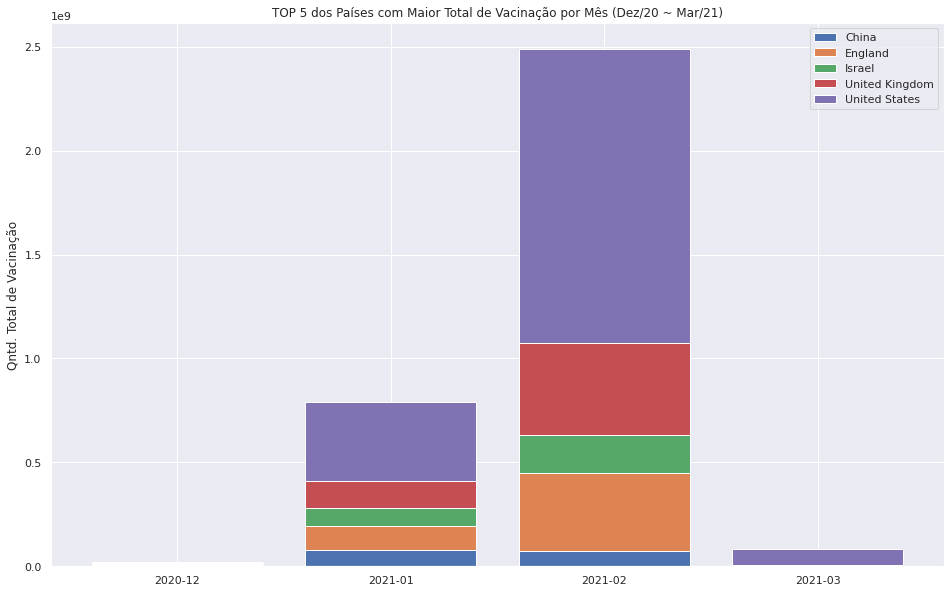

In [ ]:
plt.figure(figsize=(16,10))

altura = 0

for pais in paises:
    plt.bar(meses, 
            df_col_emp[pais], 
            label=pais, 
            bottom=altura)
    altura += df_col_emp[pais].values

plt.ylabel('Qntd. Total de Vacinação')
plt.title('TOP 5 dos Países com Maior Total de Vacinação por Mês (Dez/20 ~ Mar/21)')
plt.legend()
plt.show()

Como a visualização dos meses com menos registros foi minimizada, foi gerado gráfico que exibe apenas os dados dos meses dezembro/2020 e março/2021.

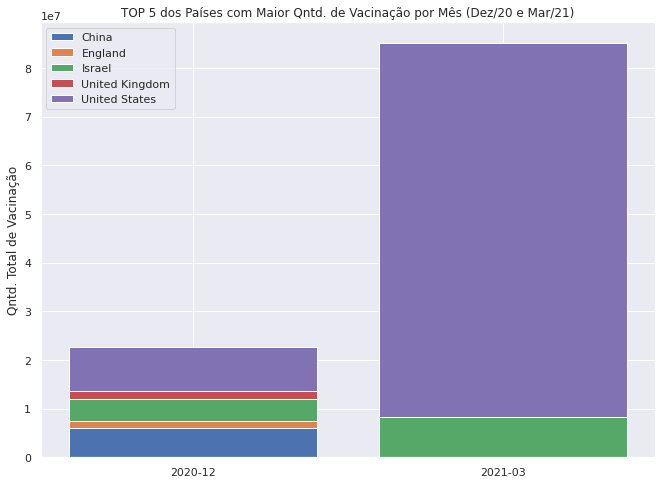

In [ ]:
copia_df_col_emp = df_col_emp.copy()

#Retirando os registros dos meses janeiro/2021 e fevereiro/2021, que possuem valores exorbitantes
copia_df_col_emp.drop(['2021-02', '2021-01'] , inplace=True)

plt.figure(figsize=(11,8))

altura = 0
meses_especificos = ['2020-12', '2021-03']

for pais in paises:
    plt.bar(meses_especificos, 
            copia_df_col_emp[pais], 
            label=pais, 
            bottom=altura)
    altura += copia_df_col_emp[pais].values

plt.ylabel('Qntd. Total de Vacinação')
plt.title('TOP 5 dos Países com Maior Qntd. de Vacinação por Mês (Dez/20 e Mar/21)')
plt.legend()
plt.show()

##TOP 5 dos Países com Maior Avanço na Vacinação contra COVID-19: Percentual do Número de Vacinações realziadas pela Quantidade Populacional

O *dataset* da seção anterior também foi utilizada para esta problemática.

In [ ]:
def getTOP5_100(_df, column1, column2, column3):
  df_aux = _df.groupby([column1, column2]).agg({column3:np.max}).reset_index()

  final_df = df_aux.sort_values(by=[column3], ascending=False)
  return final_df.head()

In [ ]:
#Adquirindo dataframes específicos para cada mês/ano presente, desconsiderando NaNs e dados faltantes 
#Para o período 2020-12

df_dez20_100 = getDFByPeriod(df_vacinas_covid, 'month_year', '2020-12')
df_dez20_100 = getDFWithOnlyData(df_dez20_100, 'total_vaccinations_per_hundred')
df_dez20_100 = getTOP5_100(df_dez20_100, 'month_year', 'country', 'total_vaccinations_per_hundred')
df_dez20_100 = df_dez20_100.sort_values(by=['country'])
df_dez20_100

,month_year,country,total_vaccinations_per_hundred
1,2020-12,Bahrain,3.45
12,2020-12,England,1.50
21,2020-12,Israel,11.52
28,2020-12,Northern Ireland,1.64
36,2020-12,Scotland,1.73


In [ ]:
#Adquirindo dataframes específicos para cada mês/ano presente, desconsiderando NaNs e dados faltantes 
#Para o período 2021-01

df_jan21_100 = getDFByPeriod(df_vacinas_covid, 'month_year', '2021-01')
df_jan21_100 = getDFWithOnlyData(df_jan21_100, 'total_vaccinations_per_hundred')
df_jan21_100 = getTOP5_100(df_jan21_100, 'month_year', 'country', 'total_vaccinations_per_hundred')
df_jan21_100 = df_jan21_100.sort_values(by=['country'])
df_jan21_100

,month_year,country,total_vaccinations_per_hundred
23,2021-01,England,15.18
29,2021-01,Gibraltar,39.43
39,2021-01,Israel,57.44
69,2021-01,Seychelles,31.38
79,2021-01,United Arab Emirates,33.71


In [ ]:
#Adquirindo dataframes específicos para cada mês/ano presente, desconsiderando NaNs e dados faltantes 
#Para o período 2021-02

df_fev21_100 = getDFByPeriod(df_vacinas_covid, 'month_year', '2021-02')
df_fev21_100 = getDFWithOnlyData(df_fev21_100, 'total_vaccinations_per_hundred')
df_fev21_100 = getTOP5_100(df_fev21_100, 'month_year', 'country', 'total_vaccinations_per_hundred')
df_fev21_100 = df_fev21_100.sort_values(by=['country'])
df_fev21_100

,month_year,country,total_vaccinations_per_hundred
34,2021-02,Falkland Islands,49.73
38,2021-02,Gibraltar,109.25
51,2021-02,Israel,93.70
93,2021-02,Seychelles,80.78
107,2021-02,United Arab Emirates,60.87


In [ ]:
#Gibraltar possui valor (em porcentagem) acima de 100. Foi considerada a retirada desse registro
index_country = df_vacinas_covid[df_vacinas_covid['total_vaccinations_per_hundred'] >= 100.0].index 
df_vacinas_covid.drop(index_country, inplace = True) 

#Repetimos o código acima
df_fev21_100 = getDFByPeriod(df_vacinas_covid, 'month_year', '2021-02')
df_fev21_100 = getDFWithOnlyData(df_fev21_100, 'total_vaccinations_per_hundred')
df_fev21_100 = getTOP5_100(df_fev21_100, 'month_year', 'country', 'total_vaccinations_per_hundred')
df_fev21_100 = df_fev21_100.sort_values(by=['country'])
df_fev21_100

,month_year,country,total_vaccinations_per_hundred
34,2021-02,Falkland Islands,49.73
38,2021-02,Gibraltar,99.05
51,2021-02,Israel,93.70
93,2021-02,Seychelles,80.78
107,2021-02,United Arab Emirates,60.87


In [ ]:
#Adquirindo dataframes específicos para cada mês/ano presente, desconsiderando NaNs e dados faltantes 
#Para o período 2021-03

df_mar21_100 = getDFByPeriod(df_vacinas_covid, 'month_year', '2021-03')
df_mar21_100 = getDFWithOnlyData(df_mar21_100, 'total_vaccinations_per_hundred')
df_mar21_100 = getTOP5_100(df_mar21_100, 'month_year', 'country', 'total_vaccinations_per_hundred')
df_mar21_100 = df_mar21_100.sort_values(by=['country'])
df_mar21_100

,month_year,country,total_vaccinations_per_hundred
18,2021-03,Isle of Man,25.87
19,2021-03,Israel,94.88
26,2021-03,Maldives,21.67
35,2021-03,United Arab Emirates,60.95
36,2021-03,United States,22.99


Nas tabelas apresentadas, verifica-se que os países *Israel*, *United Arab Emirates*, *Seychelles*, *England* e *Gibraltar* são os mais comuns. Deste modo, a análise do avanço de vacinação focará nos países mencionados.

In [ ]:
#paises_100 = [ 'Israel', 'United Arab Emirates', 'Seychelles', 'England', 'Gibraltar'] 
paises_100 = ['England', 'Gibraltar', 'Israel', 'Seychelles', 'United Arab Emirates']

In [ ]:
def getTotalVac100ByCountryPeriod (_df, _country, _period):
  query = _df.query("(country==@_country) and (month_year==@_period)")

  return query['total_vaccinations_per_hundred'].max()

In [ ]:
#Alguns registros não possuem informação numérica - ou está vazio ('') ou é um dado faltante.
df_vacinas_covid['total_vaccinations_per_hundred'].fillna(0.0,inplace=True)

In [ ]:
def getDF100ByCountryPeriod(_df, _period):
  df_aux = pd.DataFrame({'month_year': [],
                         'country': [],
                         'total_vaccinations_per_hundred': []})
  for pais in paises_100:
    df_aux = df_aux.append({'month_year':_period, 
                                'country':pais, 
                                'total_vaccinations_per_hundred':getTotalVac100ByCountryPeriod (_df, pais, _period)}, 
                              ignore_index=True)
    
  df_aux.sort_values(by=['total_vaccinations_per_hundred'], ascending=False, inplace=True)
  return df_aux

In [ ]:
df_dez20_100 = getDF100ByCountryPeriod(df_vacinas_covid, '2020-12')
df_dez20_100 = df_dez20_100.sort_values(by=['country'])
df_dez20_100

,month_year,country,total_vaccinations_per_hundred
0,2020-12,England,1.50
1,2020-12,Gibraltar,NaN
2,2020-12,Israel,11.52
3,2020-12,Seychelles,NaN
4,2020-12,United Arab Emirates,NaN


Não existe dado relativo ao percentual de total de vacinações para os três últimos países. Portanto, foi aplicado o fillna().

In [ ]:
df_dez20_100['total_vaccinations_per_hundred'].fillna(0.0,inplace=True)
df_dez20_100

,month_year,country,total_vaccinations_per_hundred
0,2020-12,England,1.50
1,2020-12,Gibraltar,0.00
2,2020-12,Israel,11.52
3,2020-12,Seychelles,0.00
4,2020-12,United Arab Emirates,0.00


In [ ]:
df_jan21_100 = getDF100ByCountryPeriod(df_vacinas_covid, '2021-01')
df_jan21_100 = df_jan21_100.sort_values(by=['country'])
df_jan21_100

,month_year,country,total_vaccinations_per_hundred
0,2021-01,England,15.18
1,2021-01,Gibraltar,39.43
2,2021-01,Israel,57.44
3,2021-01,Seychelles,31.38
4,2021-01,United Arab Emirates,33.71


In [ ]:
df_fev21_100 = getDF100ByCountryPeriod(df_vacinas_covid, '2021-02')
df_fev21_100 = df_fev21_100.sort_values(by=['country'])
df_fev21_100

,month_year,country,total_vaccinations_per_hundred
0,2021-02,England,31.65
1,2021-02,Gibraltar,99.05
2,2021-02,Israel,93.70
3,2021-02,Seychelles,80.78
4,2021-02,United Arab Emirates,60.87


In [ ]:
df_mar21_100 = getDF100ByCountryPeriod(df_vacinas_covid, '2021-03')
df_mar21_100 = df_mar21_100.sort_values(by=['country'])
df_mar21_100

,month_year,country,total_vaccinations_per_hundred
0,2021-03,England,NaN
1,2021-03,Gibraltar,NaN
2,2021-03,Israel,94.88
3,2021-03,Seychelles,NaN
4,2021-03,United Arab Emirates,60.95


Não temos dados dos países *Seychelles*, *England* e *Gibraltar*, possivelmente porque o dataset possui, nos  dados de somente o dia primeiro do mês de março.

In [ ]:
df_mar21_100['total_vaccinations_per_hundred'].fillna(0.0,inplace=True)
df_mar21_100

,month_year,country,total_vaccinations_per_hundred
0,2021-03,England,0.00
1,2021-03,Gibraltar,0.00
2,2021-03,Israel,94.88
3,2021-03,Seychelles,0.00
4,2021-03,United Arab Emirates,60.95


In [ ]:
df_top5_meses_100 = pd.concat([df_dez20_100, df_jan21_100])
df_top5_meses_100 = pd.concat([df_top5_meses_100, df_fev21_100])
df_top5_meses_100 = pd.concat([df_top5_meses_100, df_mar21_100])
df_top5_meses_100.reset_index(inplace=True, drop=True)
df_top5_meses_100

,month_year,country,total_vaccinations_per_hundred
0,2020-12,England,1.50
1,2020-12,Gibraltar,0.00
2,2020-12,Israel,11.52
3,2020-12,Seychelles,0.00
4,2020-12,United Arab Emirates,0.00
5,2021-01,England,15.18
6,2021-01,Gibraltar,39.43
7,2021-01,Israel,57.44
8,2021-01,Seychelles,31.38
9,2021-01,United Arab Emirates,33.71


In [ ]:
#Gerando um outro dataframe (reshape do df_top5_meses_100)
dados_100 = {}
meses_100 = df_top5_meses_100['month_year'].unique()

for pais in paises_100:
  dados_100[pais] = df_top5_meses_100[df_top5_meses_100['country']==pais]['total_vaccinations_per_hundred'].values

df_col_emp_100 = pd.DataFrame(dados_100, index=meses_100)
df_col_emp_100

,England,Gibraltar,Israel,Seychelles,United Arab Emirates
2020-12,1.50,0.00,11.52,0.00,0.00
2021-01,15.18,39.43,57.44,31.38,33.71
2021-02,31.65,99.05,93.70,80.78,60.87
2021-03,0.00,0.00,94.88,0.00,60.95


In [ ]:
lista = []
for mes in meses_100:
    lista.append(df_col_emp_100.loc[mes].values / df_col_emp_100.loc[mes].sum())
df_col_emp_100 = pd.DataFrame(np.matrix(lista), index=meses_100, columns=paises_100)
df_col_emp_100

,England,Gibraltar,Israel,Seychelles,United Arab Emirates
2020-12,0.115207,0.000000,0.884793,0.000000,0.000000
2021-01,0.085695,0.222592,0.324263,0.177148,0.190301
2021-02,0.086464,0.270591,0.255976,0.220680,0.166289
2021-03,0.000000,0.000000,0.608869,0.000000,0.391131


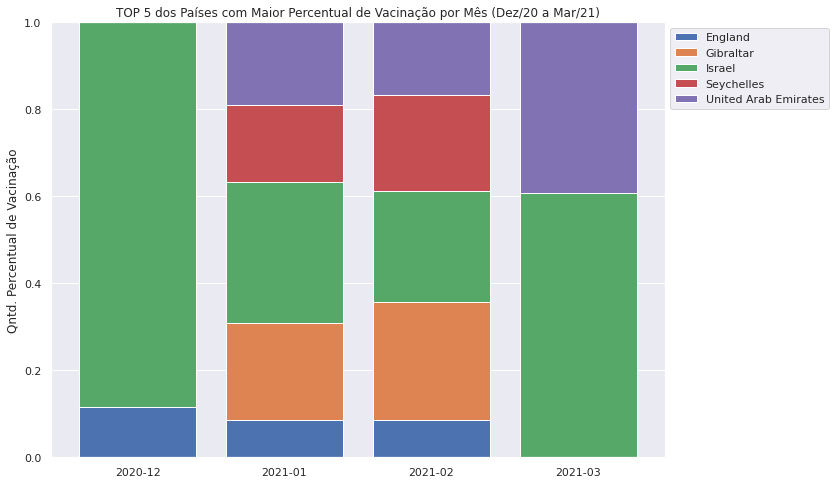

In [ ]:
plt.figure(figsize=(11,8))

altura = 0

for pais in paises_100:
    plt.bar(meses_100, df_col_emp_100[pais], label=pais, bottom=altura)
    altura += df_col_emp_100[pais].values

plt.ylabel('Qntd. Percentual de Vacinação')
plt.title('TOP 5 dos Países com Maior Percentual de Vacinação por Mês (Dez/20 a Mar/21)')
plt.legend(bbox_to_anchor=(1, 0, 0, 1))
plt.show()

# Composition - Static
## Dataset: Supermarket sales

Este dataset possui dados de vendas de um supermercado do Myanmar, dos meses de janeiro, fevereiro e março de 2019.

Fonte: https://www.kaggle.com/aungpyaeap/supermarket-sales

*   Colunas

1. **Invoice id:** número de identificação da fatura do recibo de venda gerado por computador

2. **Branch:** lojas (franquias??) do supermercado (A, B e C).

3. **City:** local dos supermercados

4. **Customer type:** Tipos de clientes, registado como Membros para clientes com cartão de sócio e Normal para sem cartão de sócio.

5. **Gender:** Gênero dos clientes

6. **Product line:** Grupos de categorização de itens gerais - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens

7. **Unit price:** Preço de cada produto em $

8. **Quantity:** Número de produtos adquiridos pelo cliente

9. **Tax:** Taxa de imposto de 5% para a compra do cliente

10. **Total:** Preço total incluindo impostos

11. **Date:** Data da compra (registro disponível de janeiro de 2019 a março de 2019)

12. **Time:** Hora da compra (10h às 21h)

13. **Payment:** Pagamento usado pelo cliente para a compra (3 métodos disponíveis - Dinheiro, Cartão de Crédito e Ewallet)

14. **COGS:** Custo dos produtos vendidos

15. **Gross margin percentage:** Porcentagem da margem bruta

16. **Gross income:** Renda bruta

17. **Rating:** Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10)

In [ ]:
#Leitura do Dataset
df_vendas = pd.read_csv("/content/drive/Shareddrives/mod5_trabalhopratico/bases/supermarket_sales - Sheet1.csv")
df_vendas

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
#Organizando nome das colunas
colunas = df_vendas.columns.str.lower().str.replace('\s+', '_')
df_vendas.columns = colunas
df_vendas

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
#Formatação data
df_vendas['date'] = pd.to_datetime(df_vendas['date'])
print(df_vendas['date'].dt.month.unique())
print(df_vendas['date'].dt.year.unique())

[1 3 2]
[2019]


## Porcentagem de vendas para cada categoria

In [ ]:
#Quantidade de categorias
len(df_vendas['product_line'].unique())

6

In [ ]:
#Quantidade de produtos vendidos por categoria
df_categorias = df_vendas.groupby('product_line').agg({'quantity':'sum'}).reset_index()\
                         .sort_values(by = 'quantity', ascending = False)
df_categorias

,product_line,quantity
0,Electronic accessories,971
2,Food and beverages,952
5,Sports and travel,920
4,Home and lifestyle,911
1,Fashion accessories,902
3,Health and beauty,854


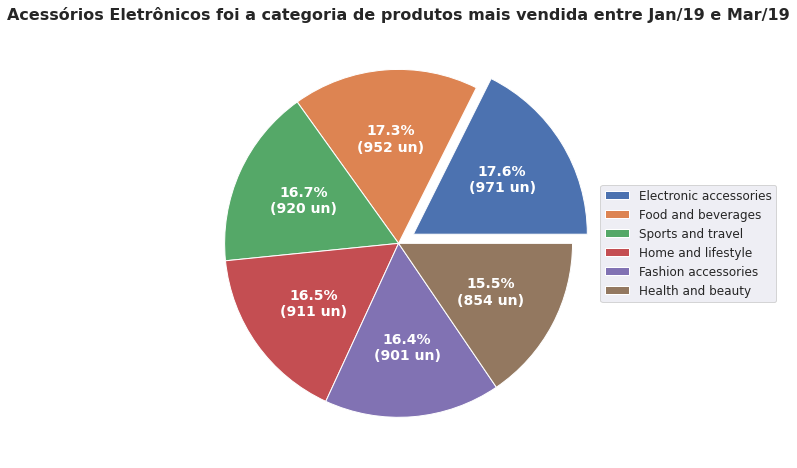

In [ ]:
#Gráfico de Pizza 
def set_label(pct, sizes):
    valor = int(pct/100.*np.sum(sizes))
    return '%.1f%%\n(%d un)'%(pct, valor)

fig, ax = plt.subplots(figsize = (8,8,))
labels = df_categorias['product_line']
sizes = df_categorias['quantity']
explode = (0.1, 0, 0, 0, 0, 0)

fatias, texts, autotexts = ax.pie(sizes, 
        explode = explode,
        autopct = lambda pct: set_label(pct, sizes),
        textprops = {'color':'w', 'weight':'bold', 'size': 14}
       )

ax.legend(fatias, labels, loc = 'center left', bbox_to_anchor = (0.95, 0, 0.5, 1), fontsize = 12)
plt.title('Acessórios Eletrônicos foi a categoria de produtos mais vendida entre Jan/19 e Mar/19', loc = 'center', weight = 'bold', size = 16)
plt.show()

## Total de vendas acumulado por semana
### Janeiro de 2019 a março de 2019

In [ ]:
#Adicionando coluna com o número da semana
df_vendas['week_number'] = df_vendas['date'].dt.week

#Adicionando coluna com o mês
df_vendas['month'] = df_vendas['date'].dt.month

#Adicionando coluna com o ano
df_vendas['year'] = df_vendas['date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
#Total de vendas por semana
df_total_vendas = df_vendas.total.groupby([df_vendas['week_number']]).agg({'sum'})
df_total_vendas = df_total_vendas.rename({'sum': 'total'}, axis = 'columns').reset_index()
df_total_vendas

,week_number,total
0,1,17543.3895
1,2,24461.1990
2,3,28693.3605
3,4,29286.8835
4,5,28360.4475
5,6,27101.8335
6,7,25563.5940
7,8,17328.6645
8,9,29219.7150
9,10,28418.8380


In [ ]:
#Gráfico de cascata customizado - Parte 1
df_resultado = df_total_vendas[['total']].copy()
em_branco = df_resultado['total'].cumsum().shift(1).fillna(0)

total_geral = df_resultado.sum().total
df_resultado.loc['total_geral'] = total_geral
em_branco.loc['total_geral'] = total_geral

passo = em_branco.reset_index(drop=True).repeat(3).shift(-1)
passo[1::3] = np.nan
em_branco.loc['total_geral'] = 0

In [ ]:
#Renomeando index
df_resultado = df_resultado.rename({0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8',
                                    8: '9', 9: '10', 10: '11', 11: '12', 12: '13'}, axis='index')

df_resultado

,total
1,17543.3895
2,24461.1990
3,28693.3605
4,29286.8835
5,28360.4475
6,27101.8335
7,25563.5940
8,17328.6645
9,29219.7150
10,28418.8380


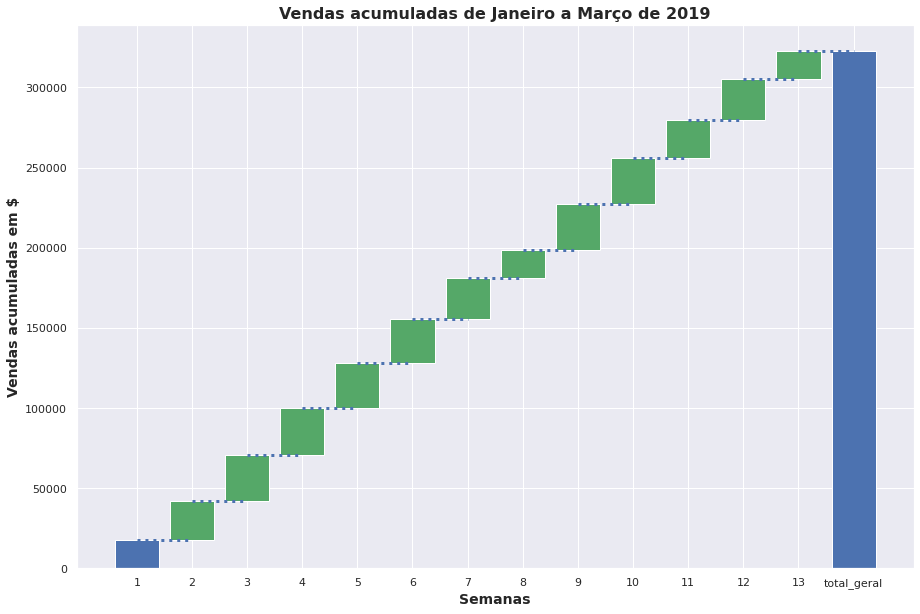

In [ ]:
#Gráfico de cascata customizado - Parte 2
plt.figure(figsize = (15,10))

cores = ['#4C72B0']+\
    df_resultado.total.loc['2':'13']\
        .apply(lambda total: '#55A868' if total >= 0 else '#C44E51').tolist()\
    +['#4C72B0']

plt.bar(df_resultado.index, df_resultado.total, bottom=em_branco, color=cores)
plt.plot(passo.index, passo.values, ls = ':', linewidth = 3)

plt.title('Vendas acumuladas de Janeiro a Março de 2019', weight = 'bold', size = 16)
plt.xlabel('Semanas', weight = 'bold', size = 14)
plt.ylabel('Vendas acumuladas em $', weight = 'bold', size = 14)

plt.show()

## Análise detalhada da categoria mais vendida

In [ ]:
#Porcentagem do total de quantidades vendidas das top 3 categorias
df_top_3 = df_categorias.copy().sort_values(by = 'quantity', ascending = False)[:3]
df_top_3['pct'] = df_top_3['quantity'] / df_top_3['quantity'].sum() * 100
df_top_3

,product_line,quantity,pct
0,Electronic accessories,971,34.154063
2,Food and beverages,952,33.485754
5,Sports and travel,920,32.360183


In [ ]:
#Quantidade de vendas da categoria "acessórios eletrônicos" por mês
#Separando data em colunas mês e ano
categoria = df_top_3['product_line'].values[0]
df_top_3_mes = df_vendas[df_vendas['product_line'] == categoria].quantity.groupby([df_vendas['month'],
                                                                                   df_vendas['year']])\
                                                                         .agg({'sum'}).reset_index()
df_top_3_mes = df_top_3_mes.rename({'sum': 'quantity'}, axis = 'columns')

#Junta mês e ano na mesma coluna
df_top_3_mes['date'] = df_top_3_mes['month'].map(str) + '-' + df_top_3_mes['year'].map(str)
df_top_3_mes['date'] = pd.to_datetime(df_top_3_mes['date'], format = '%m-%Y').dt.strftime('%m-%Y')

#Move coluna data para o inicio do DF
col = df_top_3_mes.pop('date')
df_top_3_mes.insert(0, col.name, col)

#Porcentagem do total de quantidades vendidas da categoria "acessórios eletrônicos" por mês
df_top_3_mes['pct'] = df_top_3_mes['quantity'] / df_top_3_mes['quantity'].sum() * 100

df_top_3_mes

,date,month,year,quantity,pct
0,01-2019,1,2019,333,34.294542
1,02-2019,2,2019,313,32.234809
2,03-2019,3,2019,325,33.470649


In [ ]:
def get_periodo (data_venda):
    if data_venda < pd.to_datetime('2019-1-11'):
        return 'De 01 a 10'
    if data_venda < pd.to_datetime('2019-1-21'):
        return 'De 11 a 20'    
    return 'Depois do dia 20'

In [ ]:
#Porcentagem do total de quantidades vendidas da categoria "acessórios eletrônicos" no mês de Janeiro
categoria = df_top_3['product_line'].values[0]
mes = df_top_3_mes.month.values[0]
ano = df_top_3_mes.year.values[0]

df_top_3_mes_periodo = df_vendas[
    (df_vendas['month'] == mes) &                                
    (df_vendas['year'] == ano) & 
    (df_vendas['product_line'] == categoria)].copy()
df_top_3_mes_periodo['periodo'] = df_top_3_mes_periodo['date'].apply(get_periodo)
df_top_3_mes_periodo = df_top_3_mes_periodo.groupby('periodo').agg({'quantity':np.sum})\
                                        .sort_values(by = 'quantity', ascending = False)

df_top_3_mes_periodo = df_top_3_mes_periodo.rename({'sum': 'quantity'}, axis = 'columns')

df_top_3_mes_periodo['pct'] = \
df_top_3_mes_periodo['quantity'] / df_top_3_mes_periodo['quantity'].sum() * 100
df_top_3_mes_periodo

,quantity,pct
periodo,,
Depois do dia 20,165,49.54955
De 11 a 20,100,30.03003
De 01 a 10,68,20.42042


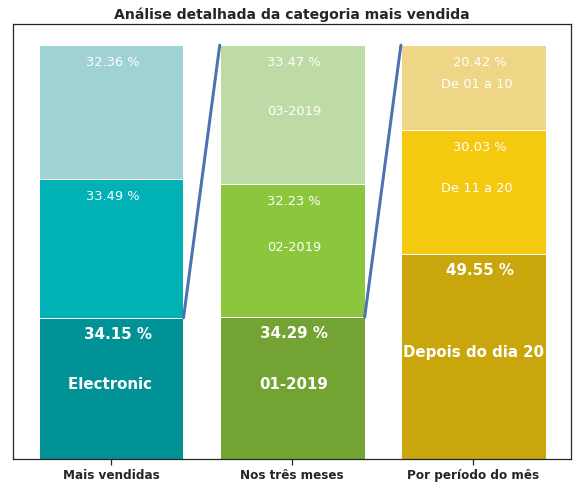

In [ ]:
#Gráfico de colunas 100% empilhadas com sub-componentes
sns.set_style("ticks")
categoria = df_top_3['product_line'].values[0]

fontdict={'size':13,'color':'w'} 
fontdict_bold={'size':15,'color':'w', 'weight':'bold'} 

cores1 = ['#019295', '#00B1B5', '#A0D1D3', ]
cores2 = ['#73A332', '#8CC63D', '#BEDBA6', ]
cores3 = ['#C9A60B', '#F5C910', '#EFD586', ]

altura = 0
fig, ax = plt.subplots(figsize=(10,8))

for i, percentual in enumerate(df_top_3['pct']):
    ax.bar([0], percentual, bottom=altura, color=[cores1[i]])
    if i==0:
        ax.text(-.15, percentual-5, '%.2f %%'%percentual, fontdict=fontdict_bold)
        ax.text(-.24, percentual/2, categoria[:11], fontdict=fontdict_bold)
    else:
        ax.text(-.14, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict)
    altura += percentual

altura=0
for i, percentual in enumerate(df_top_3_mes['pct']):
    ax.bar([1], percentual, bottom=altura, color=[cores2[i]])
    if i==0:
        ax.text(.82, percentual-5, '%.2f %%'%percentual, fontdict=fontdict_bold)
        ax.text(.82, percentual/2, df_top_3_mes.date[i], fontdict=fontdict_bold)
    else:
        ax.text(.86, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict)
        ax.text(.86, percentual/2+altura, df_top_3_mes.date[i], fontdict=fontdict)
    altura += percentual

altura=0
for i, percentual in enumerate(df_top_3_mes_periodo['pct']):
    ax.bar([2], percentual, bottom=altura, color=[cores3[i]])
    if i==0:
        ax.text(1.85, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict_bold)
        ax.text(1.61, percentual/2, df_top_3_mes_periodo.index[i], fontdict=fontdict_bold)
    else:
        ax.text(1.89, percentual+altura-5, '%.2f %%'%percentual, fontdict=fontdict)
        ax.text(1.82, percentual/2+altura, df_top_3_mes_periodo.index[i], fontdict=fontdict)
    altura += percentual    

plt.plot([0.4, .6, np.nan, 1.4, 1.6],
         [df_top_3['pct'].values[0], 100, np.nan, df_top_3_mes['pct'].values[0], 100], 
         linewidth=3)
    
plt.xticks(range(3), labels = ['Mais vendidas', 'Nos três meses', 'Por período do mês'], weight = 'bold',
           size = 12)
plt.yticks([])
plt.title('Análise detalhada da categoria mais vendida', weight = 'bold', size = 14)

plt.show()

# Comparison
## Dataset: Dataset de junção de tabelas (vendas, clientes, produtos) de 2 bancos diferentes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
#from pandas_profiling import ProfileReport

In [ ]:
#Só precisar executar uma vez
sns.set_theme()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/Visualizacao/tudo.csv', sep = ',')
df_original

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email
0,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,3.89990,2433.800,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
1,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,4.00000,1196.580,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
2,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,1.38452,1975.000,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
3,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.22500,119.526,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
4,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.89000,2386.940,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
...,...,...,...,...,...,...,...,...,...,...
44495,Ashlynn Jaskolski,3d9d0fd1-0406-3ee8-84ee-5a29be946b2b,235,Roselyn Road,3366.300,3.00000,3455.700,2019-12-10 02:43:34+00:00,1981-04-24 06:20:37+00:00,leffler.mafalda@example.net
44496,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,2.45209,1896.100,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44497,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,3.08220,3997.900,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44498,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,1.00000,2695.000,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net


In [ ]:
df_original['updated_at'] = pd.to_datetime(df_original['updated_at'])
df_original.dtypes

name                       object
sale_id                    object
product_id                  int64
product                    object
price_y                   float64
quantity                  float64
price_x                   float64
created_at                 object
updated_at    datetime64[ns, UTC]
email                      object
dtype: object

In [ ]:
df = df_original 
df.head()

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email
0,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,3.89990,2433.800,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
1,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,4.00000,1196.580,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
2,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,1.38452,1975.000,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
3,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.22500,119.526,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
4,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.89000,2386.940,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net


In [ ]:
#df['updated_at'] =  pd.to_datetime(df['updated_at'], format='%d/%m/%Y')
#df
df['ano_update'] = df['updated_at'].apply(lambda x: str(x)[:4])
df['ano_mes_update'] = df['updated_at'].apply(lambda x: str(x)[:7])
df

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email,ano_update,ano_mes_update
0,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,3.89990,2433.800,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net,2007,2007-02
1,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,4.00000,1196.580,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net,2007,2007-02
2,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,1.38452,1975.000,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net,2007,2007-02
3,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.22500,119.526,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net,2007,2007-02
4,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.89000,2386.940,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net,2007,2007-02
...,...,...,...,...,...,...,...,...,...,...,...,...
44495,Ashlynn Jaskolski,3d9d0fd1-0406-3ee8-84ee-5a29be946b2b,235,Roselyn Road,3366.300,3.00000,3455.700,2019-12-10 02:43:34+00:00,1981-04-24 06:20:37+00:00,leffler.mafalda@example.net,1981,1981-04
44496,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,2.45209,1896.100,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net,1986,1986-06
44497,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,3.08220,3997.900,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net,1986,1986-06
44498,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,1.00000,2695.000,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net,1986,1986-06


In [ ]:
df.sort_values(by='quantity', ascending=False)[:100]

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email,ano_update,ano_mes_update
6425,Prof. Lessie Stokes,5dddc1ac-4517-3ba8-84f2-4f657723438e,282,Dedrick Courts,2959.920,5.0,2738.220,1972-01-29 15:03:55+00:00,1980-05-04 06:38:19+00:00,faustino.nienow@example.org,1980,1980-05
26337,Mr. Otis Walsh Sr.,3e9b8d61-d11f-3c89-ac1a-7c879a4d5a4a,287,Audrey Summit,902.364,5.0,2171.430,2010-04-15 23:57:50+00:00,2017-05-02 02:24:17+00:00,crooks.gwen@example.com,2017,2017-05
40423,Florida Mosciski MD,862e433a-a325-36ad-bbc9-7febe7540413,240,Hayden Lake,712.000,5.0,1581.600,1992-10-20 19:30:02+00:00,2000-06-03 16:26:03+00:00,enoch34@example.com,2000,2000-06
30101,Mr. Jamel Goldner V,2d8391bd-8dac-3cc8-a177-fb8677d1af9c,370,Lorena Highway,1441.810,5.0,1883.230,2013-03-12 15:01:44+00:00,1976-10-04 21:40:38+00:00,lockman.flavie@example.com,1976,1976-10
37100,Una Hickle III,000cafdd-3ebc-3b35-a82b-1478dcd08d0e,205,Mattie Field,3396.850,5.0,1724.000,1970-07-11 15:57:43+00:00,2000-07-15 05:51:46+00:00,brekke.amir@example.com,2000,2000-07
...,...,...,...,...,...,...,...,...,...,...,...,...
40152,Layla Schumm,1f7ab805-e2d5-303d-b787-e976978ed035,241,Beahan Circles,3556.520,5.0,3240.980,2003-01-09 16:31:42+00:00,2001-12-11 09:56:55+00:00,dennis.sawayn@example.org,2001,2001-12
13021,Brain Bailey,45685455-bad3-3af4-990e-5f5129aa19a7,336,Boyle Gardens,3772.580,5.0,1876.310,2018-09-28 05:11:01+00:00,1983-02-03 19:49:55+00:00,roxanne85@example.org,1983,1983-02
19520,Dr. Marcel Boyle,013308fe-2569-36f3-b27f-b59109fa68ff,261,Skiles Loaf,3571.710,5.0,1649.840,1999-06-06 20:55:03+00:00,2007-05-18 20:57:55+00:00,jacobson.lacey@example.net,2007,2007-05
43173,Miss Mariana Rempel II,e4f97421-1ddf-3b30-a07b-dd010740c7ab,313,Smitham Falls,1361.000,5.0,137.821,1996-04-02 13:42:20+00:00,1983-04-04 11:37:33+00:00,lehner.lonzo@example.net,1983,1983-04


In [ ]:
df_produtos = df.groupby(['name','ano_update','ano_mes_update']).agg({'quantity':np.sum, 'price_x':np.sum, 'price_y':np.sum})\
        .reset_index().rename(columns={'quantity':'qtde_vendida', \
                                       'price_x':'valor_x',\
                                       'price_y':'valor_y'})
df_produtos

,name,ano_update,ano_mes_update,qtde_vendida,valor_x,valor_y
0,Aaliyah Walker,1970,1970-11,8.524231,2993.0988,2089.556
1,Aaliyah Walker,2014,2014-04,13.836441,6911.2370,15125.000
2,Aaron Hills,1970,1970-09,3.150375,13252.4100,1384.088
3,Aaron Hills,1996,1996-05,9.973120,10650.1300,7016.000
4,Abagail Brakus,1998,1998-06,5.369258,14729.9200,520.608
...,...,...,...,...,...,...
9986,Zoila Johnston III,1973,1973-11,16.960880,12784.7540,2813.484
9987,Zoila Johnston III,1999,1999-11,11.358000,10131.4100,4757.320
9988,Zoila Lesch,1972,1972-03,7.593425,10733.4990,6895.920
9989,Zoila Lesch,1972,1972-05,14.049080,8245.8100,19911.700


In [ ]:
df_top_10 = df_produtos[['name', 'qtde_vendida','valor_x', 'valor_y', 'ano_update']]\
            .sort_values(by='valor_x', ascending=False)[:10]
df_top_10.columns = ['nome','quantidade','valor_x','valor_y', 'ano_update']
df_top_10

,nome,quantidade,valor_x,valor_y,ano_update
3224,Franco Bogisich,24.077031,22986.3000,31870.890,1970
9898,Woodrow Kuvalis,22.585034,21975.8234,19442.520,1972
467,Annamarie Emard,27.786296,20542.9060,16074.984,2018
5306,Luella Leffler,24.126110,20539.5800,15095.040,2003
3467,Gloria Leannon,15.014193,20432.1500,16021.020,1997
8587,Prof. Willa Wyman,13.895480,20288.0000,7462.320,2012
2842,Elnora Crooks DVM,10.653150,19683.5000,1586.274,2012
2753,Eino Bednar,17.478060,19142.4700,21685.260,1998
3877,Ivah Bradtke,16.494080,19076.5212,9882.900,2010
8901,Roger Harris,13.909253,19067.2800,16257.480,1973


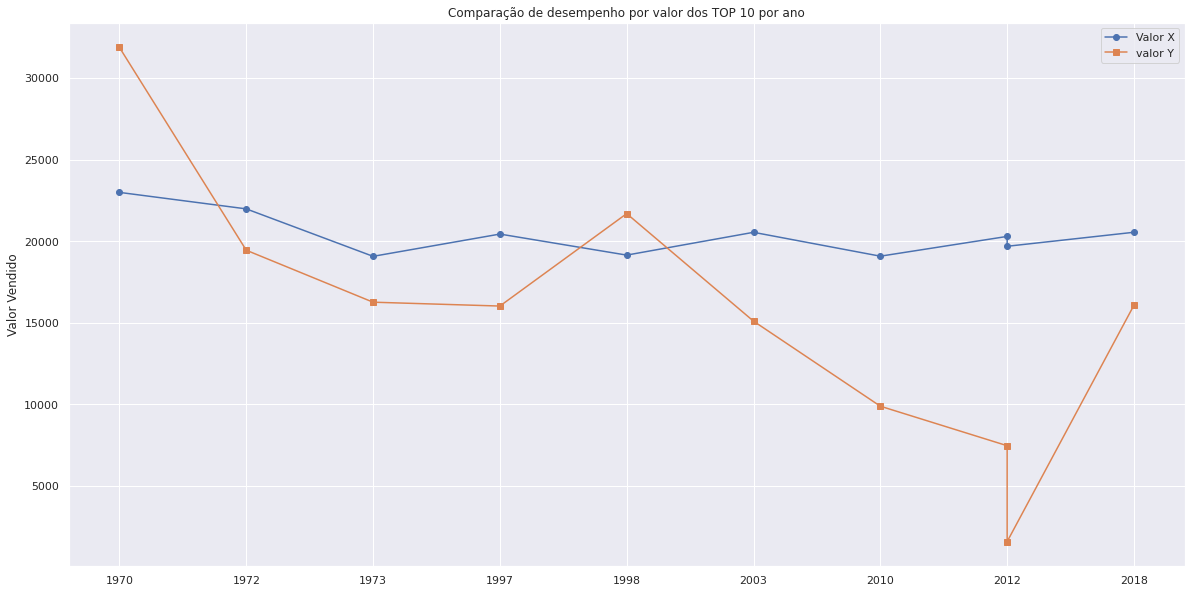

In [ ]:
df_top_10 = df_top_10.sort_values(by='ano_update', ascending=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df_top_10['ano_update'], df_top_10['valor_x'],  label='Valor X',  marker='o')
plt.plot(df_top_10['ano_update'], df_top_10['valor_y'], label='valor Y',  marker='s')
#plt.plot(meses, pontuacao3, label='Naive Bayes')
plt.legend()
plt.title('Comparação de desempenho por valor dos TOP 10 por ano')
plt.ylabel('Valor Vendido')
plt.show()

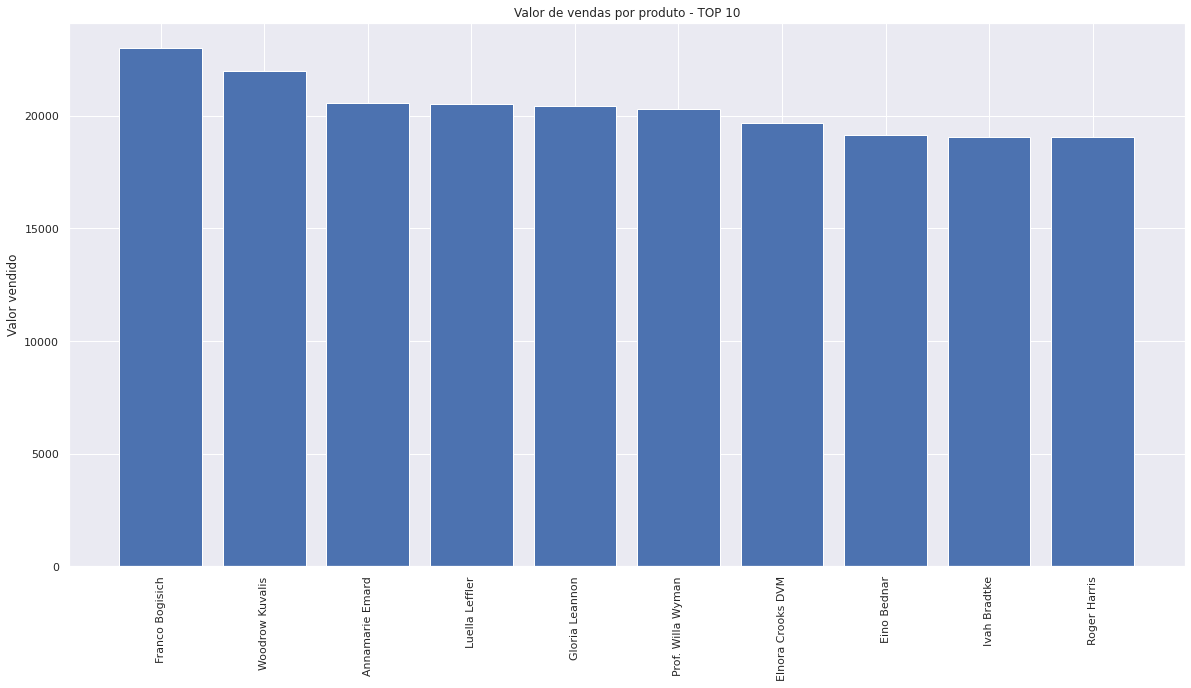

In [ ]:
df_top_10 = df_top_10.sort_values(by='valor_x', ascending=False)
plt.figure(figsize=(20,10))
plt.bar(df_top_10['nome'], df_top_10['valor_x'])
plt.xticks(rotation=90)
plt.ylabel('Valor vendido')
plt.title('Valor de vendas por produto - TOP 10')
plt.show()

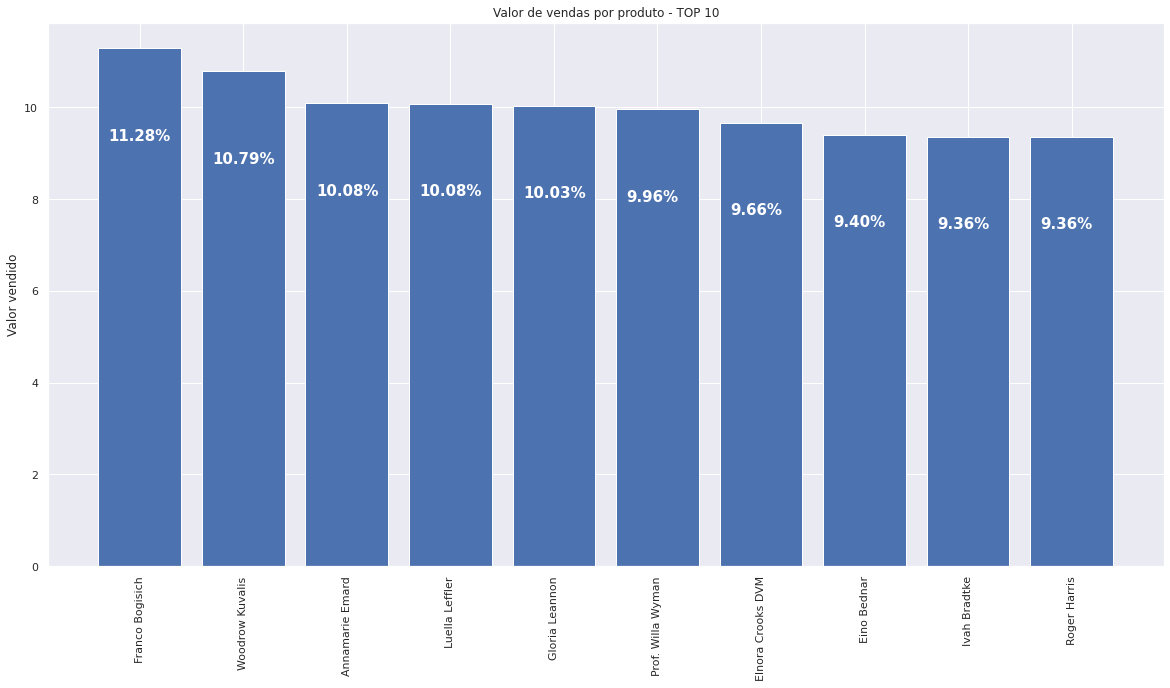

In [ ]:
x = df_top_10.nome.values
y = df_top_10.valor_x.values/df_top_10.valor_x.values.sum()*100

fig, ax = plt.subplots(figsize=(20,10))

for i, valor in enumerate(y):
    ax.text(i-0.3, valor-2, '%.2f%%'%(valor), fontdict={'color':'w', 'size':15, 'weight':'bold'})

plt.bar(x, y)

plt.xticks(rotation=90)
plt.ylabel('Valor vendido')
plt.title('Valor de vendas por produto - TOP 10')
plt.show()

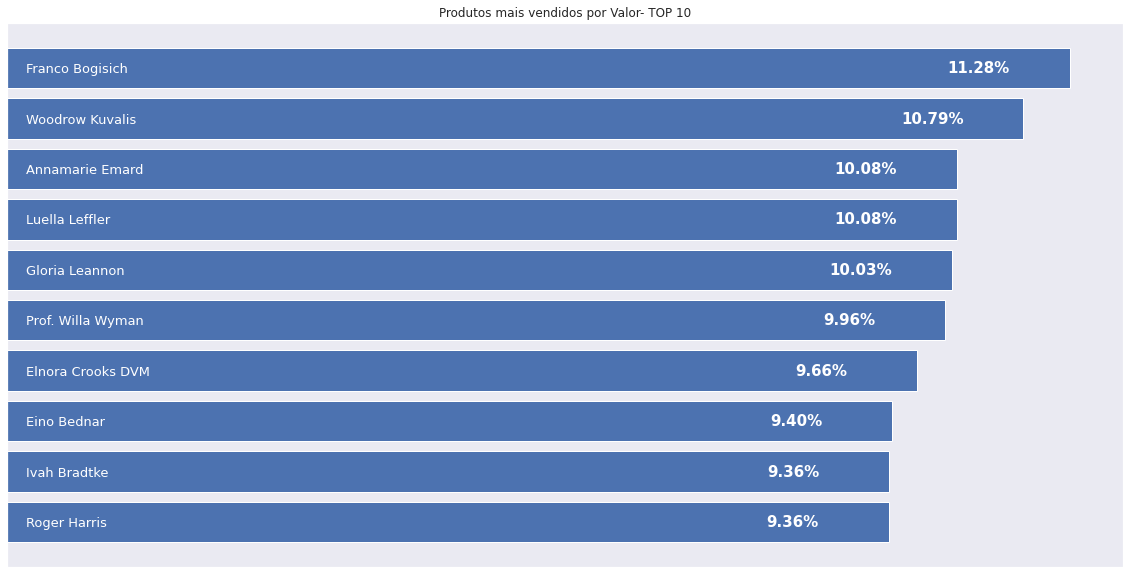

In [ ]:
df_temp = df_top_10.sort_values(by='valor_x')

x = df_temp.nome.values
y = df_temp.valor_x.values/df_temp.valor_x.values.sum()*100
sec = '#DDD7D7'
colors = ['#6A8CC4', '#4C72B0', sec, sec, sec, sec, sec, sec, sec, sec,]
font_colors = ['w', 'w', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray','gray', 'gray']

fig, ax = plt.subplots(figsize=(20,10)) 

for i, value in enumerate(y):
    ax.text(0.2, i-.1, x[i], fontdict={'color':'w', 'size':13, })
    ax.text(value-1.3, i-.1, '%.2f%%'%(value), fontdict={'color':'w', 'size':15, 'weight':'bold'})

barlist = plt.barh(x, y)

plt.xticks([])
plt.yticks([])
plt.title('Produtos mais vendidos por Valor- TOP 10')
plt.show()

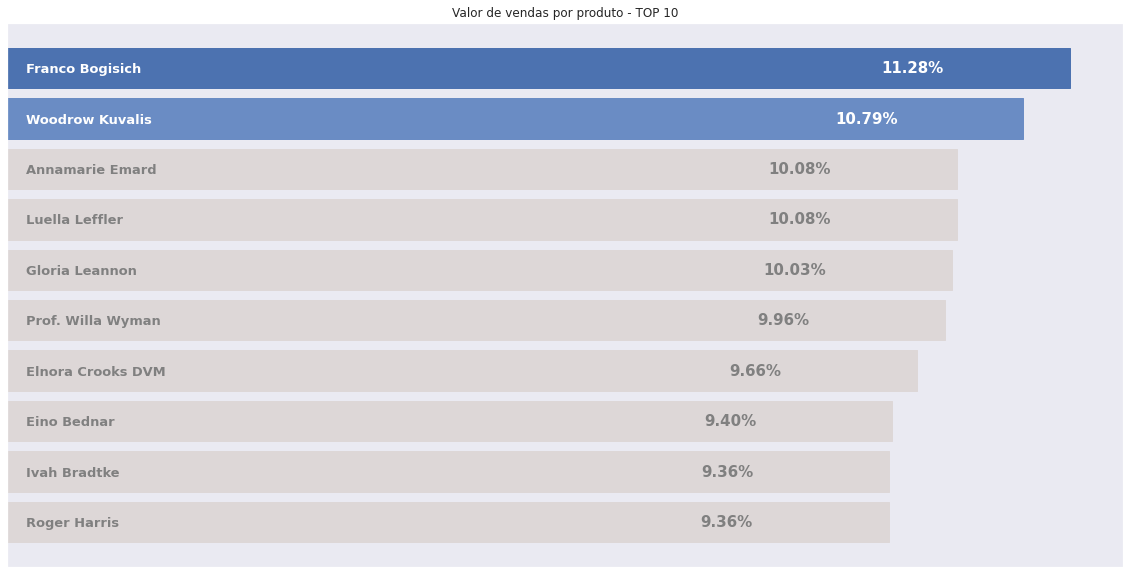

In [ ]:
df_temp = df_top_10.sort_values(by='valor_x')

x = df_temp.nome.values
y = df_temp.valor_x.values/df_top_10.valor_x.values.sum()*100

sec = '#DDD7D7'
colors = [sec, sec, sec, sec, sec, sec, sec, sec, '#6A8CC4', '#4C72B0']
font_colors = ['gray', 'gray', 'gray', 'gray', 'gray','gray','gray','gray', 'w', 'w']

fig, ax = plt.subplots(figsize=(20,10))

for i, valor in enumerate(y):
    ax.text(valor-2, i-.1, '%.2f%%'%(valor), 
            fontdict={'color':font_colors[i], 'size':15, 'weight':'bold'})
    ax.text(0.2, i-.1, x[i][:25], 
            fontdict={'color':font_colors[i], 'size':13, 'weight':'bold'})

bar_list = plt.barh(x, y)

for i, bar in enumerate(bar_list):
    bar_list[i].set_color(colors[i])

plt.xticks([])
plt.yticks([])
plt.title('Valor de vendas por produto - TOP 10')
plt.show()

In [ ]:
df_vendas_ano = df.sort_values(by='ano_update', ascending=True)
df_vendas_ano = df.ano_update.value_counts().sort_index()\
    .rename_axis('ano_update').reset_index(name='quantity')[-10:]
df_vendas_ano

,ano_update,quantity
41,2011,964
42,2012,913
43,2013,857
44,2014,986
45,2015,939
46,2016,811
47,2017,855
48,2018,944
49,2019,908
50,2020,80


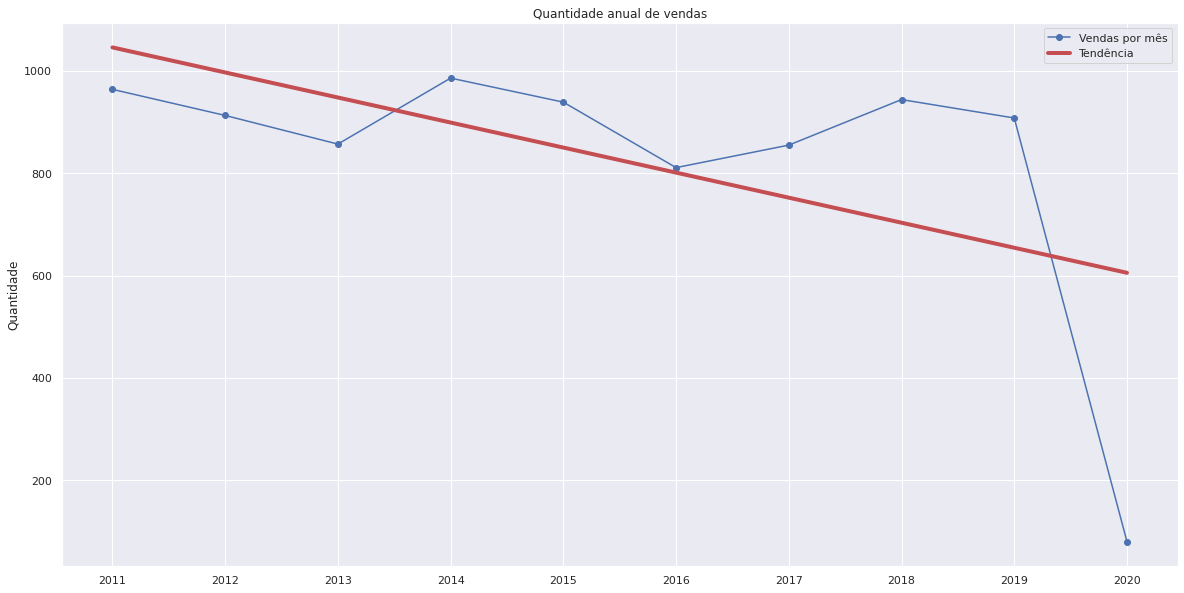

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Quantidade anual de vendas')
plt.ylabel('Quantidade')

# Cálculo da tendência
x, y = range(0,10), df_vendas_ano['quantity']
z = np.polyfit(x, df_vendas_ano['quantity'], 1)
p = np.poly1d(z)
plt.plot(df_vendas_ano['ano_update'], df_vendas_ano['quantity'], marker='o', label='Vendas por mês')
plt.plot(df_vendas_ano['ano_update'], p(x), c='r', linewidth = 4, label='Tendência')
plt.legend()
plt.show()

In [ ]:
df_vendas_ano = df.groupby('ano_update').agg({'price_x':[len, np.sum, np.mean]}).\
            sort_index().reset_index()[-10:]
df_vendas_ano.columns = ['ano_update', 'quantity', 'valor_x', 'ticket_medio']
df_vendas_ano = df_vendas_ano.sort_values(by='ano_update', ascending=True)
df_vendas_ano

,ano_update,quantity,valor_x,ticket_medio
41,2011,964.0,1.984656e+06,2058.771401
42,2012,913.0,1.867670e+06,2045.640804
43,2013,857.0,1.691477e+06,1973.719042
44,2014,986.0,1.951036e+06,1978.738068
45,2015,939.0,1.890944e+06,2013.785097
46,2016,811.0,1.638877e+06,2020.810281
47,2017,855.0,1.686614e+06,1972.648444
48,2018,944.0,1.889159e+06,2001.228051
49,2019,908.0,1.808625e+06,1991.877517
50,2020,80.0,1.554930e+05,1943.661993


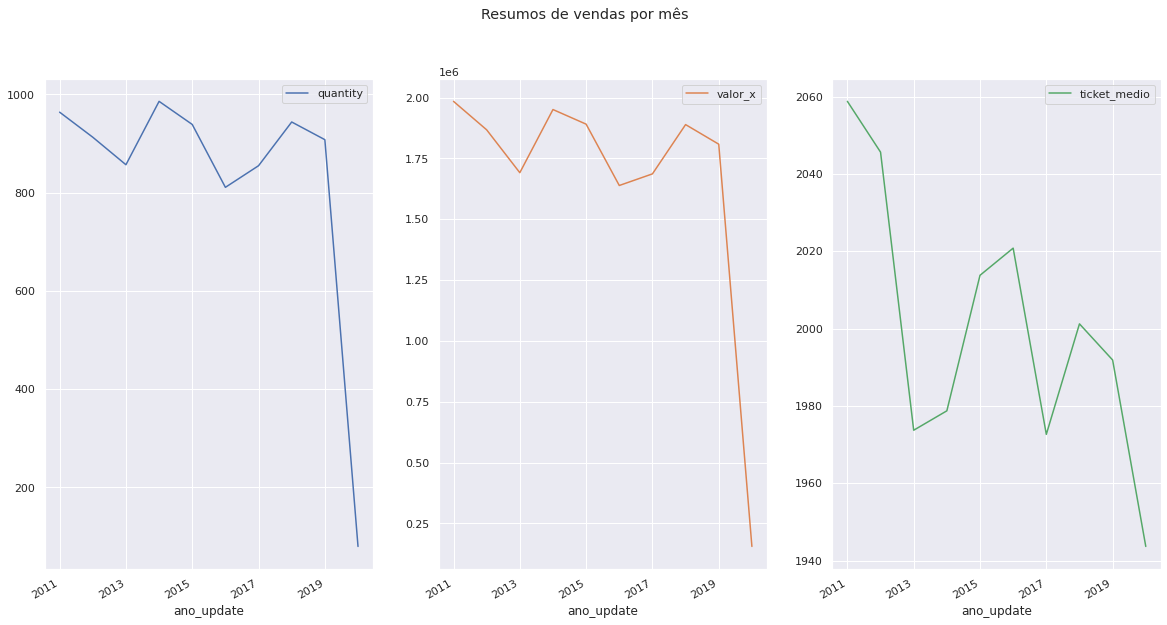

In [ ]:
df_vendas_ano.plot(subplots=True, x='ano_update', layout=(1, 3), figsize=(20,10), 
                   title='Resumos de vendas por mês'
                  )
plt.show()

In [ ]:
from math import pi

In [ ]:
df_produtos['ano_update'].value_counts()

1992    222
2014    222
1984    220
1976    217
2011    217
1987    216
1982    213
2015    212
1990    211
1989    210
1981    210
1970    209
1983    209
1988    208
2012    207
1977    207
1979    206
1972    206
2018    206
1975    206
1998    204
2019    204
2006    202
1986    201
2000    200
2010    200
1971    199
1999    198
2007    196
2001    196
1974    194
2003    194
1993    194
1980    194
2013    193
2002    193
2017    193
2005    193
1973    192
1995    192
1994    191
1996    190
1985    185
2016    182
2009    180
2008    180
1991    180
1978    179
1997    173
2004    167
2020     18
Name: ano_update, dtype: int64

In [ ]:
df_vendas_1992 = df_produtos[df_produtos['ano_update'] == '2019']
df_vendas_1992 = df_vendas_1992.groupby(['ano_mes_update']).agg({'qtde_vendida':np.sum, 'valor_x':np.sum}).reset_index()
df_vendas_1992

,ano_mes_update,qtde_vendida,valor_x
0,2019-01,217.089000,178992.2092
1,2019-02,137.245368,130426.3180
2,2019-03,193.264196,177472.1790
3,2019-04,148.857884,104312.7027
4,2019-05,262.244147,182395.4164
5,2019-06,210.234823,165263.1333
6,2019-07,240.775646,210087.4748
7,2019-08,171.718545,129641.9310
8,2019-09,155.311565,109099.1971
9,2019-10,216.128009,175098.7755


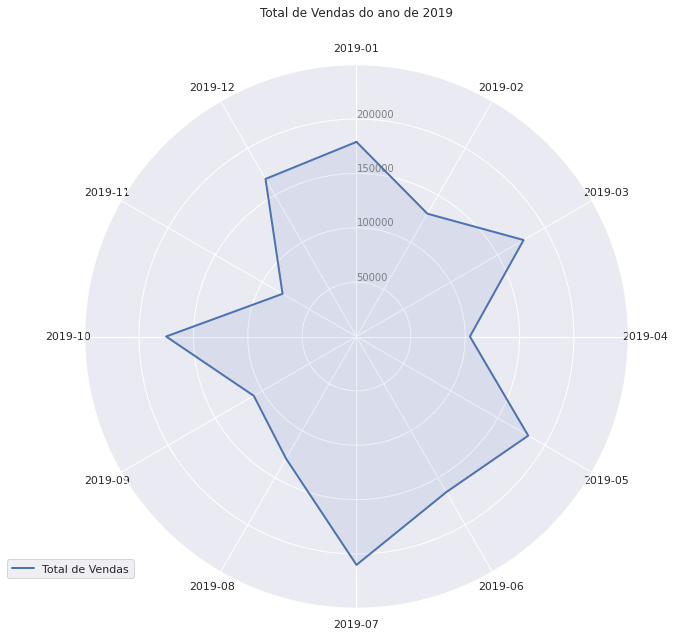

In [ ]:
from math import pi

plt.figure(figsize=(20, 10))
# Número de períodos
categories = df_vendas_1992['ano_mes_update']
N = len(categories)
 
# Qual será o ângulo de cada eixo do gráfico? #(dividimos o gráfico / número da meses)
angles = [n / float(N) * 2 * pi for n in range(N)]
# Fechando o círculo
angles += angles[:1]
 
# Inicialização do gráfico
ax = plt.subplot(111, polar=True)
 
# Se você quiser que o primeiro eixo fique no topo:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Definição de marcadores e rótulos do eixo X
plt.xticks(angles[:-1], categories)
 
# Definições do eixo Y
ax.set_rlabel_position(0)
plt.yticks([50000, 100000 ,150000, 200000],  color="grey", size=10) #
plt.ylim(0,250000)

# 'Quantidade de vendas'
values=df_vendas_1992['valor_x'].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, label='Total de Vendas')
ax.fill(angles, values, alpha=0.1)
 
plt.title('Total de Vendas do ano de 2019\n')
plt.legend(bbox_to_anchor=(0.1, 0.1))
plt.show()